In [1]:
try:
    from imports import *
except ModuleNotFoundError:
    import sys; sys.path.append("../../")
    from imports import *

# Implementing scalable matrix-vector products for the exact diagonalization methods in quantum many-body physics

In [2]:
prefix = Path("data")
os.makedirs("assets", exist_ok=True)

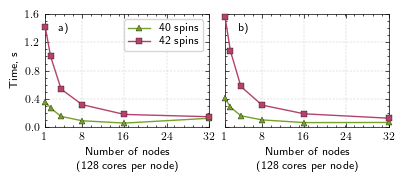

In [58]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style, {"lines.markeredgewidth": 0.25, "lines.markersize": 4,
                                                      "lines.markeredgecolor": 'black'}]):
    w, h = style["figure.figsize"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(0.9 * w, 0.4 * h))
    fig.subplots_adjust(wspace=0.1)
    f = lambda df: df[df.numLocales <= 32]
    t40 = f(pd.read_csv(prefix / "data/processed/arrFromBlockToHashed_40.csv"))
    t42 = f(pd.read_csv(prefix / "data/processed/arrFromBlockToHashed_42.csv"))
    ax1.plot(t40.numLocales, t40.arrFromBlockToHashed, clip_on=False, label="40 spins", marker="^")
    ax1.plot(t42.numLocales, t42.arrFromBlockToHashed, clip_on=False, label="42 spins", marker="s")
    t40 = f(pd.read_csv(prefix / "data/processed/arrFromHashedToBlock_40.csv"))
    t42 = f(pd.read_csv(prefix / "data/processed/arrFromHashedToBlock_42.csv"))
    ax2.plot(t40.numLocales, t40.arrFromHashedToBlock, clip_on=False, label="40 spins", marker="^")
    ax2.plot(t42.numLocales, t42.arrFromHashedToBlock, clip_on=False, label="42 spins", marker="s")
    
    for ax in [ax1, ax2]:
        ax.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
        ax.set_xticks([1, 8, 16, 24, 32]); ax.set_yticks(np.linspace(0, 1.6, 5))
        ax.set_xlim((1, 32)); ax.set_ylim((0, 1.6))
        ax.set_axisbelow(True); ax.grid()
        for c in ax.spines.values(): c.set_zorder(0.6)
    ax1.set_ylabel("Time, s"); ax1.legend(labelspacing=0.3)
    ax2.tick_params(labelleft=False)
    ax1.text(3.5, 1.35, "a)"); ax2.text(3.5, 1.35, "b)")
    fig.savefig("assets/Figure_6.pgf", backend="pgf")
fig

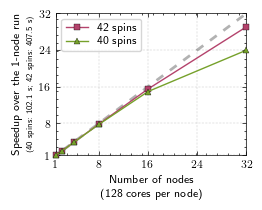

In [156]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style, {"lines.markeredgewidth": 0.25, "lines.markersize": 4,
                                                      "lines.markeredgecolor": 'black'}]):
    w, h = style["figure.figsize"]
    fig, ax = plt.subplots(figsize=(0.5 * w, 0.5 * h))
    # fig.subplots_adjust(top=0.9)
    f = lambda df: df[df.numLocales <= 32]
    t40 = f(pd.read_csv(prefix / "data/processed/enumerateStates_40.csv"))
    t42 = f(pd.read_csv(prefix / "data/processed/enumerateStates_42.csv"))
    ax.plot([0, 32], [0, 32], dashes=(3, 3), color="#000000", alpha=0.3, linewidth=2)
    ax.plot(t42.numLocales, t42.enumerateStatesSpeedup, "C1", clip_on=False, label="42 spins", marker="s")
    ax.plot(t40.numLocales, t40.enumerateStatesSpeedup, "C0", clip_on=False, label="40 spins", marker="^")
    
    ax.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
    ax.set_xticks([1, 8, 16, 24, 32])
    ax.set_yticks([1, 8, 16, 24, 32])
    ax.set_xlim((1, 32)); ax.set_ylim((1, 32))
    ax.set_axisbelow(True); ax.grid()
    for c in ax.spines.values(): c.set_zorder(0.6)
    ax.set_ylabel(r"\parbox{5cm}{\centering Speedup over the 1-node run\\{\fontsize{6pt}{8pt}\selectfont(40 spins: 102.1 s; 42 spins: 407.5 s)}}")
    ax.legend(labelspacing=0.3)
    # ax2.tick_params(labelleft=False)
    # ax1.text(3.5, 1.35, "a)"); ax2.text(3.5, 1.35, "b)")
    fig.savefig("assets/Figure_7.pgf", backend="pgf")
fig

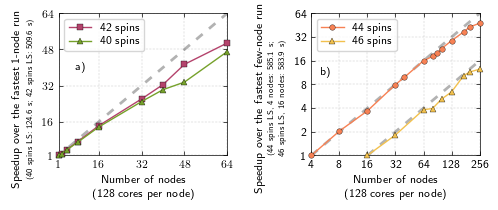

In [162]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style, {"lines.markeredgewidth": 0.25, "lines.markersize": 4,
                                                      "lines.markeredgecolor": 'black'}]):
    w, h = style["figure.figsize"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(0.95 * w, 0.5 * h))
    fig.subplots_adjust(wspace=0.5, left=0, right=0.9)
    f = lambda df: df # df[df.numLocales <= 32]
    t40 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_40.csv"))
    t42 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_42.csv"))
    ax1.plot([0, 64], [0, 64], dashes=(3, 3), color="#000000", alpha=0.3, linewidth=2)
    ax1.plot(t42.numLocales, t42.matrixVectorProductSpeedup, "C1", clip_on=False, label="42 spins", marker="s")
    ax1.plot(t40.numLocales, t40.matrixVectorProductSpeedup, "C0", clip_on=False, label="40 spins", marker="^")
    ax1.tick_params(which="minor", left=False, right=False, bottom=False, top=False)
    ax1.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
    ax1.set_ylabel(r"\parbox{5cm}{\centering Speedup over the fastest 1-node run\\"
                   + r"{\fontsize{6pt}{8pt}\selectfont(40 spins LS: 124.6~s; 42 spins LS: 509.6~s)}}")
    ax1.yaxis.set_label_coords(-0.15, 0.4)
    ax1.margins(0.05, None)

    
    t44 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_44.csv"))
    t46 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_46.csv"))
    ax2.plot([4, 256], [1, 64], dashes=(3, 3), color="#000000", alpha=0.3, linewidth=2)
    ax2.plot([16, 256], [1, 16], dashes=(3, 3), color="#000000", alpha=0.3, linewidth=2)
    ax2.plot(t44.numLocales, t44.matrixVectorProductSpeedup, "C2", clip_on=False, label="44 spins", marker="o")
    ax2.plot(t46.numLocales, t46.matrixVectorProductSpeedup, "C3", clip_on=False, label="46 spins", marker="^")
    ax2.set_xscale("log"); ax2.set_yscale("log")
    ax2.set_xticks([4, 8, 16, 32, 64, 128, 256], labels=map(str, [4, 8, 16, 32, 64, 128, 256]))
    ax2.set_yticks([1, 2, 4, 8, 16, 32, 64], labels=map(str, [1, 2, 4, 8, 16, 32, 64]))
    ax2.tick_params(which="minor", left=False, right=False, bottom=False, top=False)
    ax2.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
    ax2.set_ylabel(r"\parbox{5cm}{\centering Speedup over the fastest few-node run\\"
                   + r"{\fontsize{6pt}{8pt}\selectfont(44 spins LS, 4 nodes: 585.1~s;\\[-2pt]46 spins LS, 16 nodes: 583.9~s)}}")
    ax2.yaxis.set_label_coords(-0.15, 0.4)
    
    # ax.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
    ax1.set_xticks([1, 16, 32, 48, 64])
    ax1.set_yticks([1, 16, 32, 48, 64])
    ax1.set_xlim((1, 64)); ax1.set_ylim((1, 64))
    ax1.set_axisbelow(True); ax1.grid()
    for c in ax1.spines.values(): c.set_zorder(0.6)
    # ax.set_ylabel(r"\parbox{5cm}{\centering Speedup over the 1-node run\\{\fontsize{6pt}{8pt}\selectfont(40 spins: 102.1 s; 42 spins: 407.5 s)}}")
    ax1.legend(labelspacing=0.3)
    # # ax2.tick_params(labelleft=False)
    # 
    ax2.set_xlim((4, 256)); ax2.set_ylim((1, 64))
    ax2.set_axisbelow(True); ax2.grid()
    for c in ax2.spines.values(): c.set_zorder(0.6)
    ax2.legend(labelspacing=0.3)

    ax1.text(7, 39, "a)"); ax2.text(4.9, 10.5, "b)")
    fig.savefig("assets/Figure_8.pgf", backend="pgf")
fig

In [164]:
10 * 1024 * 8 / 30 / 3600

0.7585185185185185

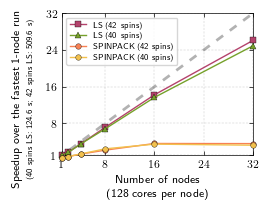

In [187]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style, {"lines.markeredgewidth": 0.25, "lines.markersize": 4,
                                                      "lines.markeredgecolor": 'black'}]):
    w, h = style["figure.figsize"]
    fig, ax = plt.subplots(figsize=(0.5 * w, 0.5 * h))

    f = lambda df: df[df.numLocales <= 32]
    t40 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_40.csv"))
    t42 = f(pd.read_csv(prefix / "data/processed/matrixVectorProduct_42.csv"))
    sp40 = pd.read_csv(prefix / "data/processed/spinpack_40.csv")
    sp42 = pd.read_csv(prefix / "data/processed/spinpack_42.csv")
    ax.plot([0, 32], [0, 32], dashes=(3, 3), color="#000000", alpha=0.3, linewidth=2)
    ax.plot(t42.numLocales, t42.matrixVectorProductSpeedup, "C1", clip_on=False, label="LS (42 spins)", marker="s")
    ax.plot(t40.numLocales, t40.matrixVectorProductSpeedup, "C0", clip_on=False, label="LS (40 spins)", marker="^")
    ax.plot(sp42.numLocales, sp42.hamiltonSpeedup, "C2", clip_on=False, label="SPINPACK (42 spins)", marker="o")
    ax.plot(sp40.numLocales, sp40.hamiltonSpeedup, "C3", clip_on=False, label="SPINPACK (40 spins)", marker="o")

    ax.legend(fontsize=6, labelspacing=0.3)
    ax.set_xlim((1, 32)); ax.set_ylim((1, 32))
    ax.set_xticks([1, 8, 16, 24, 32])
    ax.set_yticks([1, 8, 16, 24, 32])
    ax.xaxis.set_minor_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.NullLocator())
    
    ax.set_axisbelow(True); ax.grid()
    for c in ax.spines.values(): c.set_zorder(0.6)
    
    ax.set_xlabel(r"\parbox{4cm}{\centering Number of nodes\\(128 cores per node)}")
    ax.set_ylabel(r"\parbox{5cm}{\centering Speedup over the fastest 1-node run\\"
                  + r"{\fontsize{6pt}{8pt}\selectfont(40 spins LS: 124.6~s; 42 spins LS: 509.6~s)}}")
    ax.yaxis.set_label_coords(-0.15, 0.4)

    fig.savefig("assets/Figure_9.pgf", backend="pgf")
fig